In [27]:
import numpy as np
from agent_distribution import AgentDistribution
from optimal_beta import expected_policy_loss
import matplotlib.pyplot as plt
from utils import compute_continuity_noise
from agent import Agent

In [28]:
def create_generic_agent_dist(n, n_types, d):
    etas = np.random.uniform(3.0, 8.0, n_types * d).reshape(n_types, d, 1)
    gammas = np.random.uniform(0.05, 5.0, n_types * d).reshape(n_types, d, 1)
    dic = {"etas": etas, "gammas": gammas}
    agent_dist = AgentDistribution(n=n, d=d, n_types=n_types, types=dic, prop=None)
    return agent_dist

In [29]:
agent_dist = create_generic_agent_dist(n=1000000, n_types=1, d=2)
ks = np.linspace(0., 1., 20)
beta = np.random.uniform(size=2).reshape(2, 1)
beta_norm = np.sqrt(np.sum(beta ** 2))
beta /=beta_norm
q = 0.7
sigma = compute_continuity_noise(agent_dist) + 0.05

In [30]:
losses = []
for k in ks:
    beta_k = beta * k
    rand
    #s_eq = agent_dist.quantile_fixed_point_true_distribution(beta_k, sigma, q)
    loss = expected_policy_loss(agent_dist, beta_k, s_eq, sigma)
    losses.append(loss)

Text(0, 0.5, 'Equilibrium Loss$L(k \\beta, s(k\\beta))$')

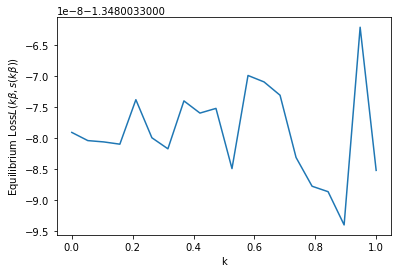

In [31]:
plt.plot(ks, losses)
plt.xlabel("k")
plt.ylabel("Equilibrium Loss" +  r"$L(k \beta, s(k\beta))$")

In [21]:
def small_loss(agent_dist, beta, s, sigma, true_beta=None):
    dim = agent_dist.d
    if true_beta is None:
        true_beta = np.zeros(beta.shape)
        true_beta[0] = 1.0

    #    bounds = compute_score_bounds(beta)
    true_scores = np.array(
        [np.matmul(true_beta.T, agent.eta).item() for agent in agent_dist.agents[:1]]
    ).reshape(1, 1)
    br_dist = agent_dist.best_response_score_distribution(beta, s, sigma)[:1]
    z = s - br_dist.reshape(1, 1)
    return z.item()

In [22]:
diffs = []
for k in ks:
    beta_k = beta * k
    s_eq = agent_dist.quantile_fixed_point_true_distribution(beta_k, sigma, q)
    z = small_loss(agent_dist, beta_k, s_eq, sigma)
    diffs.append(z)
    

Text(0, 0.5, '$s(k\\beta) - (k\\beta)^{T}\\omega(\\beta, s(k\\beta), \\eta, \\gamma)$')

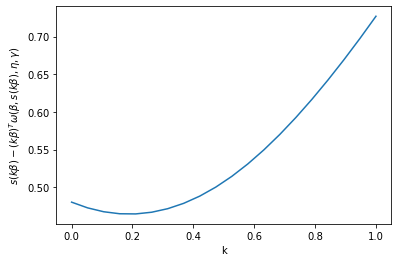

In [25]:
plt.plot(ks, diffs)
plt.xlabel("k")
plt.ylabel( r"$s(k\beta) - (k\beta)^{T}\omega(\beta, s(k\beta), \eta, \gamma)$")